In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import  load_model
from tensorflow.keras.preprocessing.image import  load_img, img_to_array
from PIL import Image

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization,Dropout, Add,Input
from sklearn.model_selection import train_test_split
from keras.models import Model

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

# specify the path to the .zip file
test1_path = "/content/drive/MyDrive/CatVsDog classification /test1.zip"
train_path = "/content/drive/MyDrive/CatVsDog classification /train.zip"

# open the .zip file in read mode
with zipfile.ZipFile(test1_path, 'r') as zip_ref:
    # extract all files to a directory named 'extracted'
    zip_ref.extractall('extracted')



with zipfile.ZipFile(train_path, 'r') as zip_ref:
    # extract all files to a directory named 'extracted'
    zip_ref.extractall('extracted')
print("All files have been extracted to the 'extracted' directory.")

All files have been extracted to the 'extracted' directory.


In [ ]:
import os
import shutil

# set the path to the directory containing the images
data_path = "/content/extracted/train"

# create subdirectories for cats and dogs
os.mkdir(os.path.join(data_path, "cat"))
os.mkdir(os.path.join(data_path, "dog"))

# move cat images to the cat subdirectory and dog images to the dog subdirectory
for filename in os.listdir(data_path):
    if filename.startswith("cat"):
        shutil.move(os.path.join(data_path, filename), os.path.join(data_path, "cat"))
    elif filename.startswith("dog"):
        shutil.move(os.path.join(data_path, filename), os.path.join(data_path, "dog"))

In [ ]:
import os
import shutil


# Set the paths of the original train directory
train_dir = '/content/extracted/train'

# Set the paths of the new train and validation directories
train_new_dir = '/content/Train'
valid_dir = '/content/validation'

# Get the file names for each class
cat_files = os.listdir(os.path.join(train_dir, 'cat'))
dog_files = os.listdir(os.path.join(train_dir, 'dog'))

# Split the file names for each class into new train and validation sets
cat_train_files, cat_valid_files = train_test_split(cat_files, test_size=0.2, random_state=42)
dog_train_files, dog_valid_files = train_test_split(dog_files, test_size=0.2, random_state=42)

# Copy the cat train files to the new train directory
for file_name in cat_train_files:
    src_path = os.path.join(train_dir, 'cat', file_name)
    dst_path = os.path.join(train_new_dir, 'cat', file_name)
    if src_path != dst_path:
        shutil.copy(src_path, dst_path)

# Copy the dog train files to the new train directory
for file_name in dog_train_files:
    src_path = os.path.join(train_dir, 'dog', file_name)
    dst_path = os.path.join(train_new_dir, 'dog', file_name)
    if src_path != dst_path:
        shutil.copy(src_path, dst_path)

# Copy the cat validation files to the validation directory
for file_name in cat_valid_files:
    src_path = os.path.join(train_dir, 'cat', file_name)
    dst_path = os.path.join(valid_dir, 'cat', file_name)
    if src_path != dst_path:
        shutil.copy(src_path, dst_path)

# Copy the dog validation files to the validation directory
for file_name in dog_valid_files:
    src_path = os.path.join(train_dir, 'dog', file_name)
    dst_path = os.path.join(valid_dir, 'dog', file_name)
    if src_path != dst_path:
        shutil.copy(src_path, dst_path)

In [ ]:


# Set the paths to the training and validation data folders
train_dir = '/content/Train'
val_dir = '/content/validation'

# Define the image generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and validation data using the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)








Found 20000 images belonging to 3 classes.
Found 5000 images belonging to 3 classes.


In [ ]:
# Define the model



inception = tf.keras.applications.InceptionV3(weights='imagenet',include_top=False,input_shape=(224,224,3))


for layer in inception.layers[:-10]:
    layer.trainable = False # Freeze weights of all layers till except the last 10

last_layer = inception.get_layer('mixed7')

print('last layer output shape: ', last_layer.output_shape)

layer_output = last_layer.output


last layer output shape:  (None, 12, 12, 768)


In [ ]:


x = Flatten()(layer_output)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inception.input, predictions)

In [ ]:
# Compile the model

# model.compile(
#     loss='binary_crossentropy',
#     optimizer=RMSprop(learning_rate=0.001),
#     metrics=['accuracy']
# )

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])



In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator),

)




Epoch 1/10
625/625 [==============================] - 333s 519ms/step - loss: 1.0937 - accuracy: 0.9388 - val_loss: 0.2183 - val_accuracy: 0.9784 - lr: 0.0010
Epoch 2/10
625/625 [==============================] - 314s 502ms/step - loss: 0.1958 - accuracy: 0.9540 - val_loss: 0.2643 - val_accuracy: 0.9740 - lr: 0.0010
Epoch 3/10
625/625 [==============================] - 312s 499ms/step - loss: 0.1889 - accuracy: 0.9575 - val_loss: 0.1198 - val_accuracy: 0.9806 - lr: 0.0010
Epoch 4/10
625/625 [==============================] - 306s 490ms/step - loss: 0.1530 - accuracy: 0.9589 - val_loss: 0.1033 - val_accuracy: 0.9830 - lr: 0.0010
Epoch 5/10
625/625 [==============================] - 309s 494ms/step - loss: 0.1821 - accuracy: 0.9567 - val_loss: 0.0610 - val_accuracy: 0.9840 - lr: 0.0010
Epoch 6/10
625/625 [==============================] - 301s 482ms/step - loss: 0.1605 - accuracy: 0.9549 - val_loss: 0.0821 - val_accuracy: 0.9866 - lr: 0.0010
Epoch 7/10
625/625 [==========================

In [ ]:
# Save the model
model.save('catdog_modelexcption.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('/content/drive/MyDrive/CatVsDog Classfction/catdog_modelexcption.h5')

In [ ]:
import matplotlib.pyplot as plt


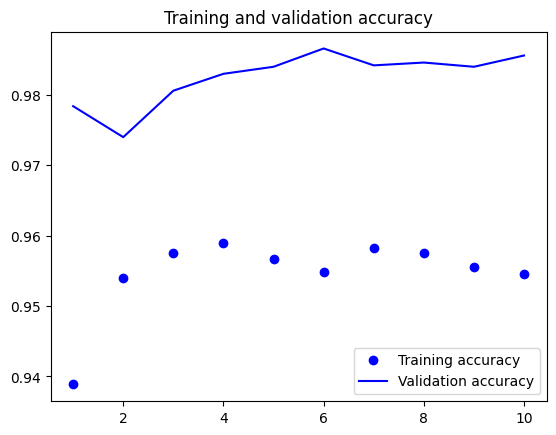

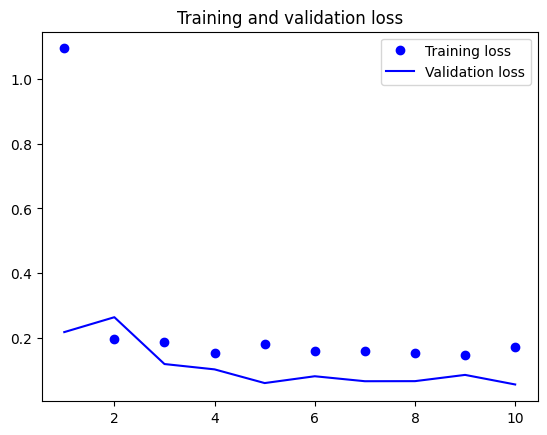

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot the accuracy curve
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot the loss curve
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_dir = '/content/extracted/test1'
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 0 images belonging to 0 classes.


1/1 [==============================] - 0s 71ms/step


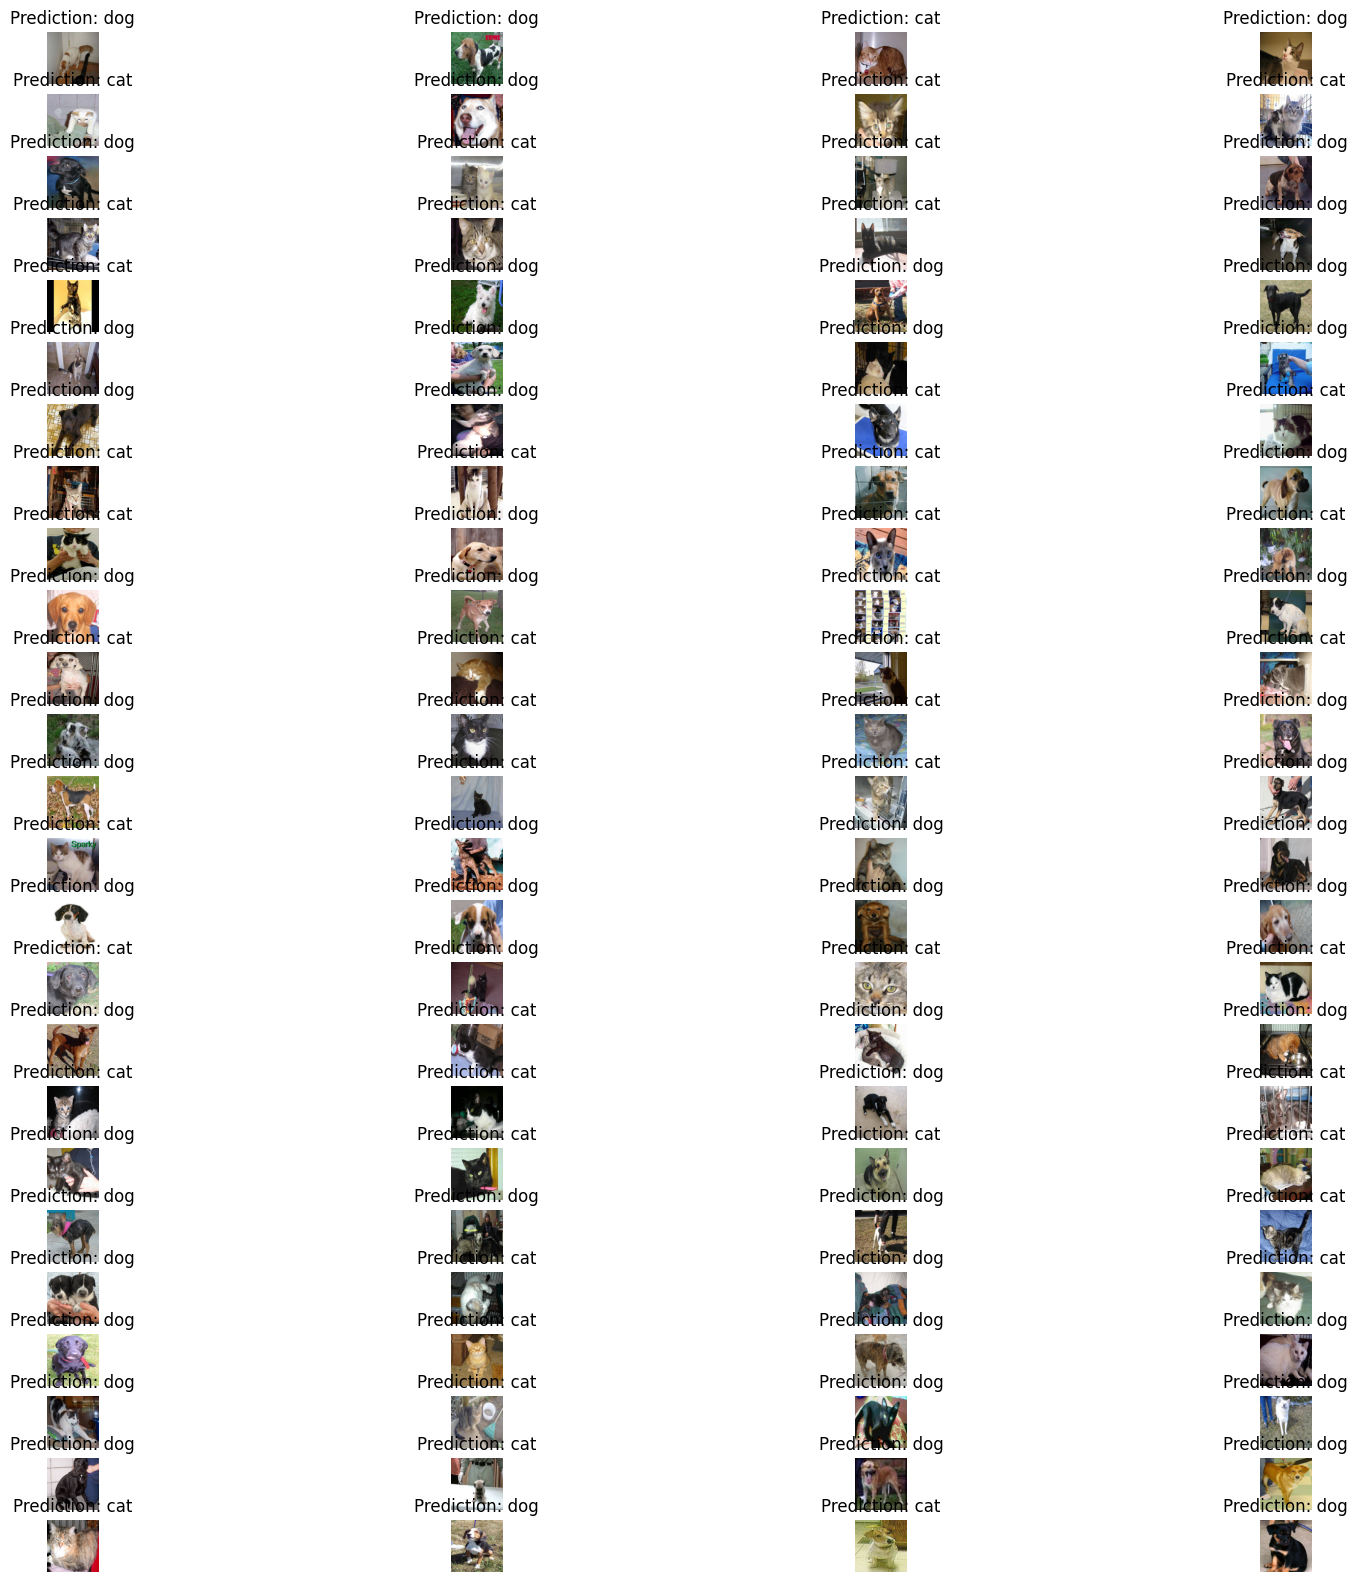

In [ ]:
# Load the test data
test_dir = '/content/extracted/test1'

test_imgs = os.listdir(test_dir)
test_imgs = [os.path.join(test_dir, img) for img in test_imgs]


# Load the trained model
model = load_model('/content/drive/MyDrive/CatVsDog classification /catdog_model.h5')

# Calculate the number of rows and columns needed to display all the images
num_cols = 4
num_rows = int(np.ceil(100 / num_cols))

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axs = axs.flatten()

# Loop over the test images
# for i, img_path in enumerate(test_imgs):
for i, img_path in enumerate(test_imgs[:100]):
    # Load the image and resize it
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Make the prediction and print the result
    prediction = model.predict(img_array)
    if prediction[0][0] < 0.5:
        label = 'cat'
    else:
        label = 'dog'

    # Display the image and label
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(f'Prediction: {label}')

plt.show()